# Importing required libraries

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color = sns.color_palette()

# Loading the Dataset and converting into dataframe

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dayakar16/KDD_Project/main/data.csv',encoding = 'ISO-8859-1')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Checking null values in columns

In [8]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

Checking null values in rows

In [9]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


Removing rows and columns with null values and creating new dataframe

In [10]:
df_new = df.dropna()

In [11]:
df_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

# Exploratory Data Analysis

## Number of orders of the customers from each country

In [12]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17
...,...,...,...
4375,18280.0,United Kingdom,10
4376,18281.0,United Kingdom,7
4377,18282.0,United Kingdom,13
4378,18283.0,United Kingdom,756


Visualization on the above number of orders in a graph 

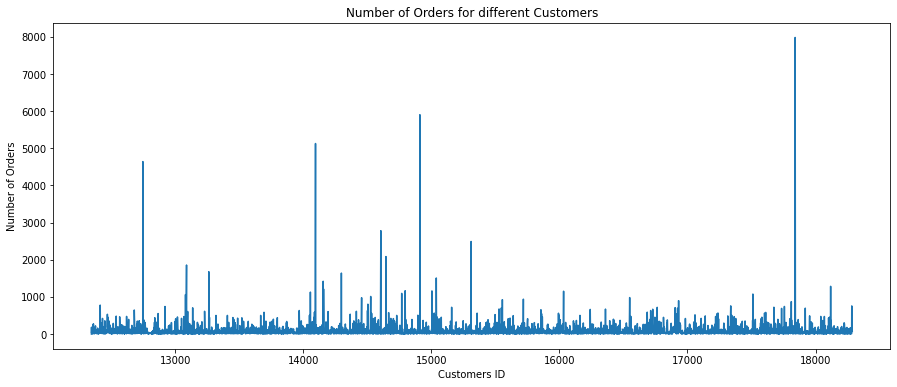

In [13]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [14]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4050,17841.0,United Kingdom,7983
1903,14911.0,EIRE,5903
1308,14096.0,United Kingdom,5128
338,12748.0,United Kingdom,4642
1682,14606.0,United Kingdom,2782


From the above graph and from above output we can see that the highest number of orders placed by a customer is 7983

## Which customer has the highest number of orders?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


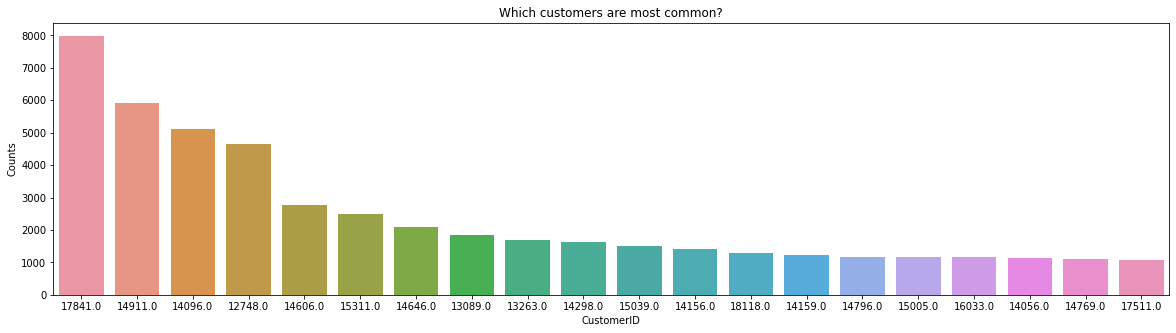

In [15]:
customer_counts = df_new.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");
plt.show()

## Amount of money spent in each country

Before calculating the amount of money spent. We will calculate the amount of money spent by using quantity and unit price.

In [16]:
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


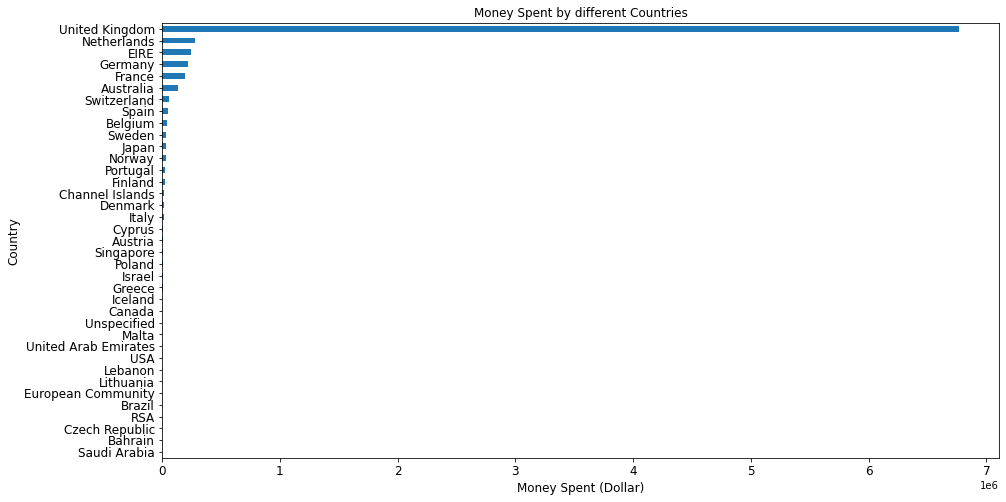

In [17]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

As we can see from the above chart that united kingdom has the highest money spending. So next we will remove the united kingdom and then see the results and compare the other countries spending.

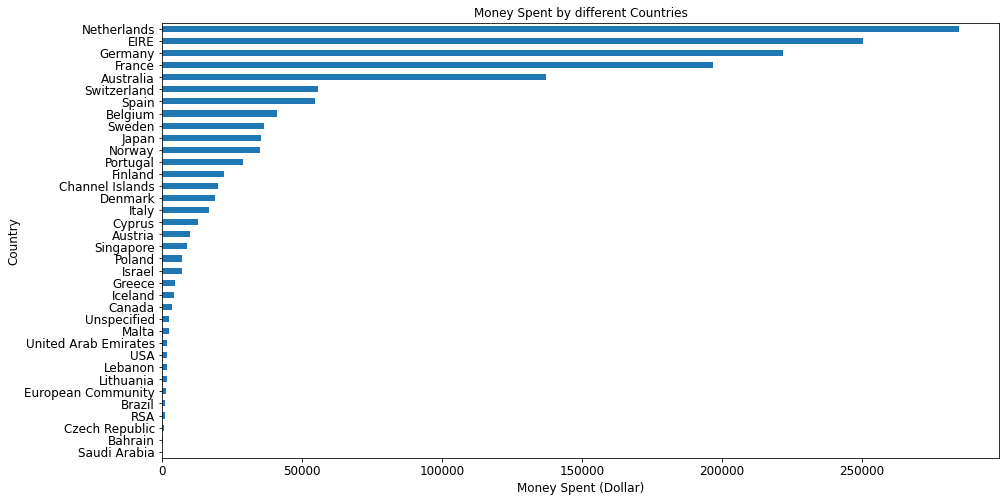

In [18]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## What are the common description that are present in the given dataset?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


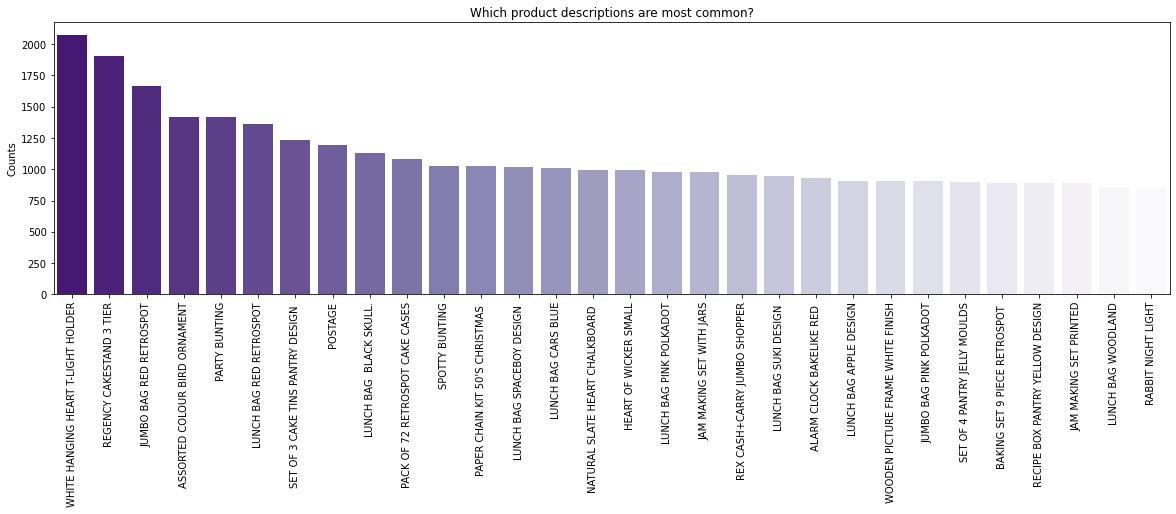

In [19]:
description_counts = df_new.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);
plt.show()

Here we can see our best selling products, items that appear in orders the most often. Also to make it visually more appealing.

## What are the most common stock codes that are used in the dataset?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


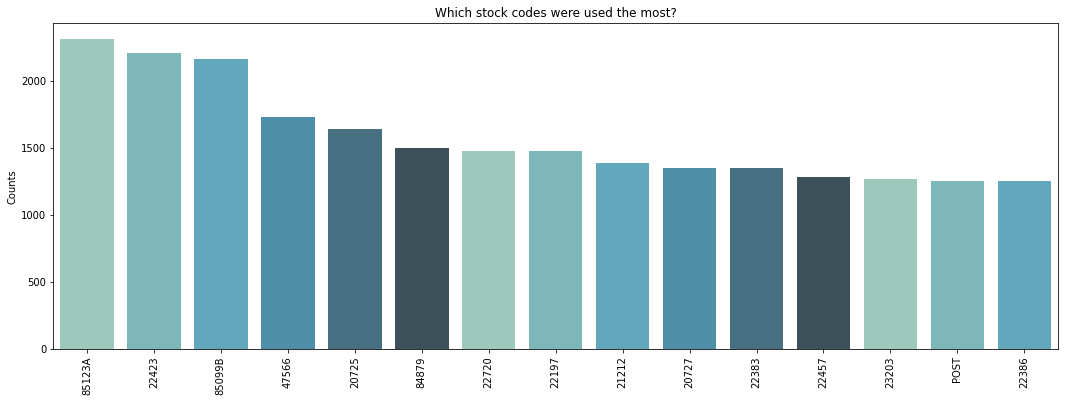

In [20]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);
plt.show()

Also checking out stoke codes, looks like they are deeply correlated with descriptions - which makes perfect sense.

For the next deliverable we will be dealing with the predicting the sales and model development for the sales pattern.

## Creating Train-Test Split

Before spliting the data into test and train we need the split the data into independent and dependent attributes. So that we can use this data to train a Machine learning model and test it with testing set which will predict the dependent value from independent values

In [23]:
y = df_new['amount_spent']
X = df_new.drop(columns=['amount_spent'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [25]:
X_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
431636,573666,22311,OFFICE MUG WARMER BLACK+SILVER,2,10/31/2011 16:24,2.95,15977.0,United Kingdom
379075,569672,22090,PAPER BUNTING RETROSPOT,1,10/5/2011 13:58,2.95,17841.0,United Kingdom
379001,569670,22530,MAGIC DRAWING SLATE DOLLY GIRL,1,10/5/2011 13:47,0.42,14730.0,United Kingdom
503813,578936,21868,POTTING SHED TEA MUG,18,11/27/2011 13:00,1.65,16923.0,United Kingdom
229411,557040,23236,DOILEY STORAGE TIN,6,6/16/2011 14:22,2.89,14243.0,United Kingdom
